Load Data source

https://techassessment.blob.core.windows.net/aiap-pys-2/noshow.db


In [2]:
# download ad import the data
import requests

url = "https://techassessment.blob.core.windows.net/aiap-pys-2/noshow.db"
file_path = "data/noshow.db"

# Download the database
response = requests.get(url)
with open(file_path, "wb") as file:
    file.write(response.content)
	
print(f"Database downloaded to {file_path}")


Database downloaded to data/noshow.db


In [3]:

import sqlite3
import pandas as pd

# Connect to the database
db_path = 'data/noshow.db'  # Ensure the file path is correct
conn = sqlite3.connect(db_path)

try:
    # List all tables in the database
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
    print("Tables in the database:", tables)

    # Load the `noshow` table into a DataFrame
    query = "SELECT * FROM noshow"
    data = pd.read_sql_query(query, conn)

    # Display the first few rows of the table
    print(data.head())

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the connection
    conn.close()

Tables in the database:      name
0  noshow
   booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0       94113      0.0   Changi      November          June         25.0   
1       86543      0.0  Orchard        August      November         28.0   
2       75928      0.0   Changi         March      February          7.0   
3       66947      1.0  Orchard     September       October          1.0   
4      106390      0.0  Orchard         March          June         20.0   

  checkout_month  checkout_day    country first_time    room         price  \
0           June          27.0  Singapore        Yes  Single   SGD$ 492.98   
1       November          29.0  Indonesia        Yes    King  SGD$ 1351.22   
2       February          11.0      India        Yes  Single          None   
3        October           3.0      China        Yes  Single   SGD$ 666.04   
4           June          24.0  Australia        Yes   Queen   USD$ 665.37   

  platform num_adults  num_chi

In [4]:
# EDA
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB
None


In [5]:
print(data.describe())

          booking_id        no_show    arrival_day   checkout_day  \
count  119391.000000  119390.000000  119390.000000  119390.000000   
mean    59695.000000       0.370416      15.798241      14.250507   
std     34465.357332       0.482918       8.780829      11.063697   
min         0.000000       0.000000       1.000000     -31.000000   
25%     29847.500000       0.000000       8.000000       7.000000   
50%     59695.000000       0.000000      16.000000      15.000000   
75%     89542.500000       1.000000      23.000000      23.000000   
max    119390.000000       1.000000      31.000000      31.000000   

        num_children  
count  119390.000000  
mean        0.871229  
std         0.779796  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         3.000000  


In [6]:
print(data.isnull().sum())


booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64


In [7]:
# Check the No show column
# Check unique values in the 'no_show' column
unique_values = data['no_show'].unique()
print("Unique values in 'no_show':", unique_values)

# Verify if all values are 0.0 or 1.0
valid_values = {0.0, 1.0}
if set(unique_values).issubset(valid_values):
    print("All values in 'no_show' are either 0.0 or 1.0.")
else:
    print("There are other values in 'no_show':", set(unique_values) - valid_values)

Unique values in 'no_show': [ 0.  1. nan]
There are other values in 'no_show': {nan}


In [8]:
print(data)

        booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0            94113      0.0   Changi      November          June         25.0   
1            86543      0.0  Orchard        August      November         28.0   
2            75928      0.0   Changi         March      February          7.0   
3            66947      1.0  Orchard     September       October          1.0   
4           106390      0.0  Orchard         March          June         20.0   
...            ...      ...      ...           ...           ...          ...   
119386        4823      0.0   Changi     September         April          3.0   
119387       25062      0.0  Orchard         March      December         30.0   
119388       81936      1.0   Changi     September         March         31.0   
119389        6738      0.0   Changi      February      February         25.0   
119390       99643      0.0   Changi         March          July         18.0   

       checkout_month  chec

In [9]:
# branch              
# booking_month         1
# arrival_month         1
# arrival_day           1
# checkout_month        1
# checkout_day          1
# country               1
# first_time            1
# room              21613
# price             24882
# platform              1
# num_adults            1
# num_children          1

# Loop through each column and print unique values
columns_to_check = [
    'branch', 'booking_month', 'arrival_month', 'arrival_day', 'checkout_month', 'checkout_day',
    'country', 'first_time', 'room', 'price', 'platform', 'num_adults', 'num_children'
]


for col in columns_to_check:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}':", unique_values)
    print(f"Number of unique values in '{col}':", len(unique_values))
    print()
    print("-" * 50)


Unique values in 'branch': ['Changi' 'Orchard' None]
Number of unique values in 'branch': 3

--------------------------------------------------
Unique values in 'booking_month': ['November' 'August' 'March' 'September' 'July' 'January' 'October' 'June'
 'December' 'April' 'May' 'February' None]
Number of unique values in 'booking_month': 13

--------------------------------------------------
Unique values in 'arrival_month': ['June' 'November' 'February' 'October' 'September' 'March' 'May' 'August'
 'July' 'January' 'April' 'December' 'ApRiL' 'OcTobeR' 'JuNe' 'JulY'
 'ApriL' 'OctOber' 'DecembEr' 'SeptEmber' 'JanUary' 'JUne' 'FeBruary'
 'JanuarY' 'DEcember' 'SePtember' 'DecembeR' 'MaY' 'NoVember' 'JUly'
 'JunE' 'JuLy' 'FebrUary' 'NOvember' 'SeptemBer' 'OctobeR' 'DecemBer'
 'MarCh' 'AuguSt' 'AugusT' 'APril' 'SepTember' 'NovembEr' 'FEbruary'
 'DeceMber' 'AuGust' 'SepteMber' 'FebruaRy' 'OctoBer' 'JanuaRy' 'MarcH'
 'ApRil' 'AUgust' 'JanuAry' 'NOveMber' 'MaRch' 'AprIl' 'MAy' 'NovemBer'
 'Dec

In [10]:
month_mapping = {
    'January': 'January', 'JanUary': 'January', 'JAnuary': 'January', 'JanuAry': 'January', 'JaNuary': 'January',
    'FEBRUARY': 'February', 'February': 'February', 'FeBruary': 'February', 'FebRuary': 'February', 'FebruAry': 'February',
    'March': 'March', 'MarCh': 'March', 'MArch': 'March', 'MaRch': 'March',
    'April': 'April', 'ApRiL': 'April', 'APril': 'April', 'ApRil': 'April', 'AprIl': 'April',
    'May': 'May', 'MaY': 'May',
    'June': 'June', 'JuNe': 'June', 'JUne': 'June', 'JUnE': 'June',
    'July': 'July', 'JulY': 'July', 'JUly': 'July', 'JuLy': 'July',
    'August': 'August', 'AuguSt': 'August', 'AugusT': 'August', 'AUgust': 'August', 'AuGust': 'August',
    'September': 'September', 'SeptEmber': 'September', 'SePtember': 'September', 'SeptemBer': 'September', 'SEptember': 'September',
    'October': 'October', 'OcTobeR': 'October', 'OcTober': 'October', 'OctOber': 'October', 'OctobeR': 'October',
    'November': 'November', 'NoVember': 'November', 'NovembeR': 'November', 'NoveMber': 'November', 'NOveMber': 'November',
    'December': 'December', 'DecembeR': 'December', 'DEcember': 'December', 'DecEMber': 'December', 'DeceMber': 'December'
}


# Standardize the arrival_month column
data['arrival_month'] = data['arrival_month'].map(month_mapping)

# Handle missing values by filling with the mode (most frequent month)
most_frequent_month = data['booking_month'].mode()[0]
data['arrival_month'] = data['arrival_month'].fillna(most_frequent_month)

# Verify the cleaned column
print("Unique values in 'arrival_month':", data['arrival_month'].unique())
print("Number of unique values in 'arrival_month':", data['arrival_month'].nunique())

Unique values in 'arrival_month': ['June' 'November' 'February' 'October' 'September' 'March' 'May' 'August'
 'July' 'January' 'April' 'December']
Number of unique values in 'arrival_month': 12


In [11]:
# Fix negative value in checkout_day

# Assume that the negative sign is added incorrectly. 
# Convert negative values to positive
data['checkout_day'] = data['checkout_day'].apply(lambda x: abs(x) if x < 0 else x)

# Verify the updated column
print("Unique values in 'checkout_day':", data['checkout_day'].unique())

Unique values in 'checkout_day': [27. 29. 11.  3. 24. 13. 16. 19. 28. 10. 12. 15. 23. 31. 25. 17.  8.  2.
  9.  7.  1. 20. 14.  4.  6. 21.  5. 18. 22. 30. 26. nan]


In [12]:
# Fix inconsistent in the number of adult
# one and 1. Change to 1 as the next column uses numerical instead of alphabets

# Define a mapping for textual to numeric conversion
adult_mapping = {'1': 1, '2': 2, 'one': 1, 'two': 2}

# Apply the mapping to the num_adults column
data['num_adults'] = data['num_adults'].map(adult_mapping)

# Fill missing values (e.g., with the mode or a default value)
most_frequent_adults = data['num_adults'].mode()[0]
data['num_adults'] = data['num_adults'].fillna(most_frequent_adults)

# Verify the cleaned column
print("Unique values in 'num_adults':", data['num_adults'].unique())

Unique values in 'num_adults': [1. 2.]


In [13]:
print(data)

        booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0            94113      0.0   Changi      November          June         25.0   
1            86543      0.0  Orchard        August      November         28.0   
2            75928      0.0   Changi         March      February          7.0   
3            66947      1.0  Orchard     September       October          1.0   
4           106390      0.0  Orchard         March          June         20.0   
...            ...      ...      ...           ...           ...          ...   
119386        4823      0.0   Changi     September         April          3.0   
119387       25062      0.0  Orchard         March      December         30.0   
119388       81936      1.0   Changi     September         March         31.0   
119389        6738      0.0   Changi      February      February         25.0   
119390       99643      0.0   Changi         March          July         18.0   

       checkout_month  chec

Clean the data for price

In [14]:
print(data['price'].head())


0     SGD$ 492.98
1    SGD$ 1351.22
2            None
3     SGD$ 666.04
4     USD$ 665.37
Name: price, dtype: object


In [15]:
# Fill missing numeric values with the median
# data['price'] = data['price'].fillna(data['price'].median())

# Define a function to process the price column
def clean_price(price):
    if pd.isna(price):  # Handle missing values
        return None
    if 'USD$' in price:  # If price is in USD
        numeric_value = float(price.replace('USD$', '').strip())
        return numeric_value * 1.3  # Convert to SGD
    elif 'SGD$' in price:  # If price is in SGD
        return float(price.replace('SGD$', '').strip())
    else:
        return None  # Handle unexpected formats

# Apply the function to the 'price' column
# this causes error
data['price'] = data['price'].apply(clean_price)

# Fill missing values with the median
# data['price'] = data['price'].fillna(data['price'].median())

# Display the cleaned price column
print(data['price'].head())

0     492.980
1    1351.220
2         NaN
3     666.040
4     864.981
Name: price, dtype: float64


In [16]:
print(data)

        booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0            94113      0.0   Changi      November          June         25.0   
1            86543      0.0  Orchard        August      November         28.0   
2            75928      0.0   Changi         March      February          7.0   
3            66947      1.0  Orchard     September       October          1.0   
4           106390      0.0  Orchard         March          June         20.0   
...            ...      ...      ...           ...           ...          ...   
119386        4823      0.0   Changi     September         April          3.0   
119387       25062      0.0  Orchard         March      December         30.0   
119388       81936      1.0   Changi     September         March         31.0   
119389        6738      0.0   Changi      February      February         25.0   
119390       99643      0.0   Changi         March          July         18.0   

       checkout_month  chec

In [17]:
print(data['no_show'].value_counts(normalize=True))

no_show
0.0    0.629584
1.0    0.370416
Name: proportion, dtype: float64


In [18]:
# Handle Missing ValueError
print(data.isnull().sum())

# check number of rows
row_count = len(data)
print(f"\nNumber of rows for DF: {row_count}")

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         0
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            0
num_children          1
dtype: int64

Number of rows for DF: 119391


In [19]:
# Temp fill in
# Example: Fill missing categorical values with 'NA'
data['room'] = data['room'].fillna('NA')
data['price'] = data['price'].fillna('NA')


In [20]:
# Check and Remove duplicate

duplicates = data.duplicated()

# Count the number of duplicate rows
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [21]:
print(data.isnull().sum())

## Note: 3 potential choice:1. Fill with NA. 2. Drop the row. 3. Fill with value [eg: median]. 
## We choose to fill NA. Because there may be pros in keeping the data for other columns

#  fill na
data['no_show'] = data['no_show'].fillna('NA')
data['branch'] = data['branch'].fillna('NA')
data['booking_month'] = data['booking_month'].fillna('NA')
data['arrival_day'] = data['arrival_day'].fillna('NA')
data['checkout_month'] = data['checkout_month'].fillna('NA')
data['checkout_day'] =data['checkout_day'].fillna('NA')
data['country'] = data['country'].fillna('NA')
data['first_time']= data['first_time'].fillna('NA')
data['platform'] = data['platform'].fillna('NA')
data['num_children'] = data['num_children'].fillna('NA')

# Drop NA
# List of columns to check for NaN
'''columns_to_check = [
    'no_show', 'branch', 'booking_month', 'arrival_day', 'checkout_month',
    'checkout_day', 'country', 'first_time', 'platform', 'num_children'
]

# Drop rows where any of these columns have NaN
data = data.dropna(subset=columns_to_check)
'''

# Verify the number of rows remaining
print(f"Number of rows after dropping rows with NaN: {len(data)}")

booking_id        0
no_show           1
branch            1
booking_month     1
arrival_month     0
arrival_day       1
checkout_month    1
checkout_day      1
country           1
first_time        1
room              0
price             0
platform          1
num_adults        0
num_children      1
dtype: int64
Number of rows after dropping rows with NaN: 119391


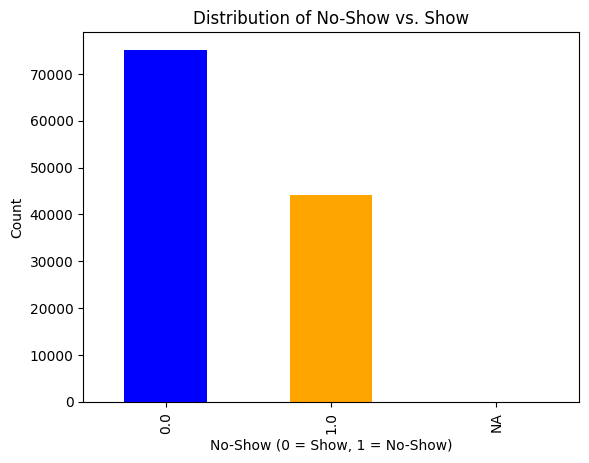

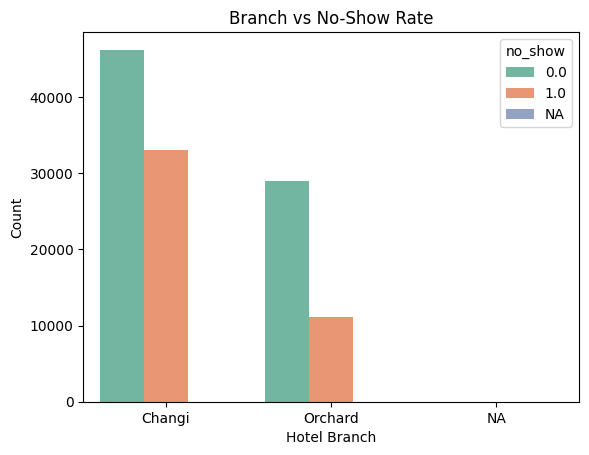

Branch No-Show Counts:
 branch   no_show
Changi   0.0        46228
         1.0        33102
NA       NA             1
Orchard  0.0        28938
         1.0        11122
dtype: int64



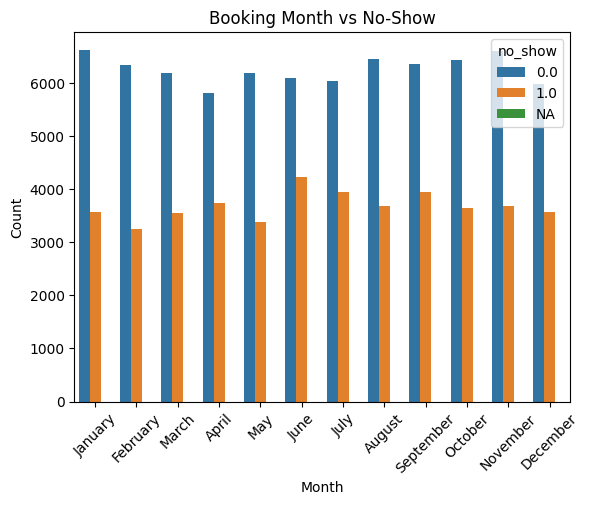

Booking Month vs No-Show:
 no_show           0.0     1.0   NA
booking_month                     
April          5821.0  3750.0  NaN
August         6456.0  3678.0  NaN
December       5982.0  3579.0  NaN
February       6339.0  3249.0  NaN
January        6634.0  3580.0  NaN
July           6037.0  3956.0  NaN
June           6099.0  4225.0  NaN
March          6201.0  3553.0  NaN
May            6200.0  3388.0  NaN
NA                NaN     NaN  1.0
November       6603.0  3677.0  NaN
October        6428.0  3640.0  NaN
September      6366.0  3949.0  NaN


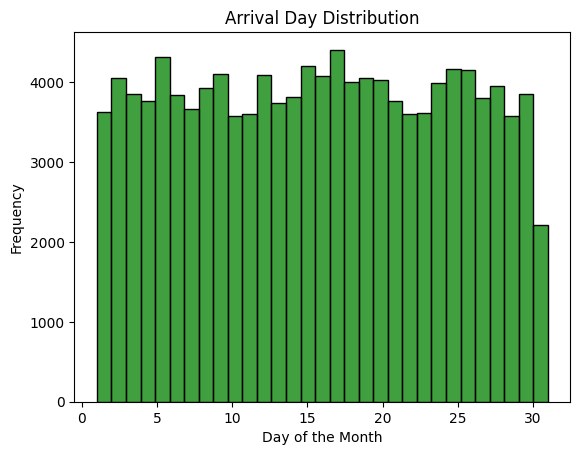

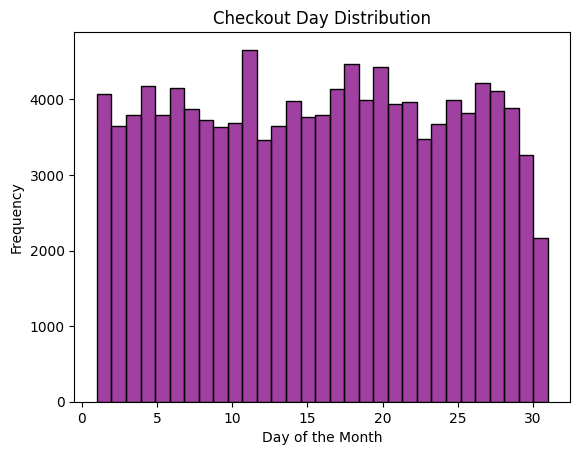

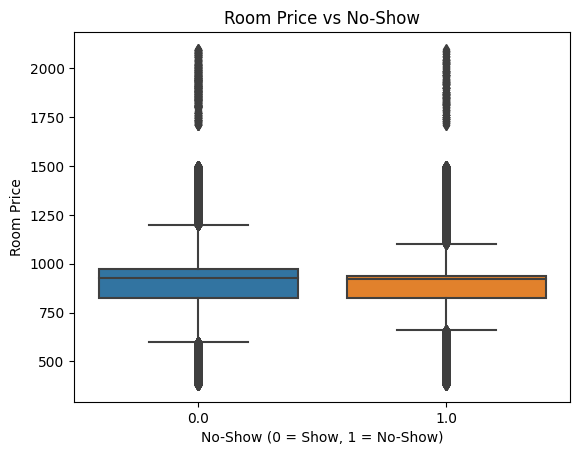

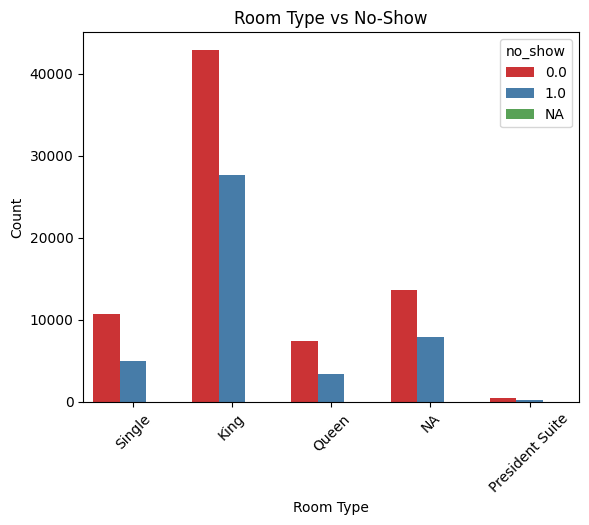

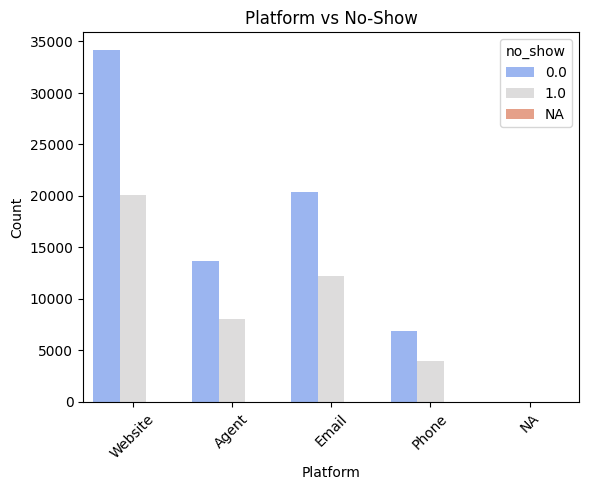

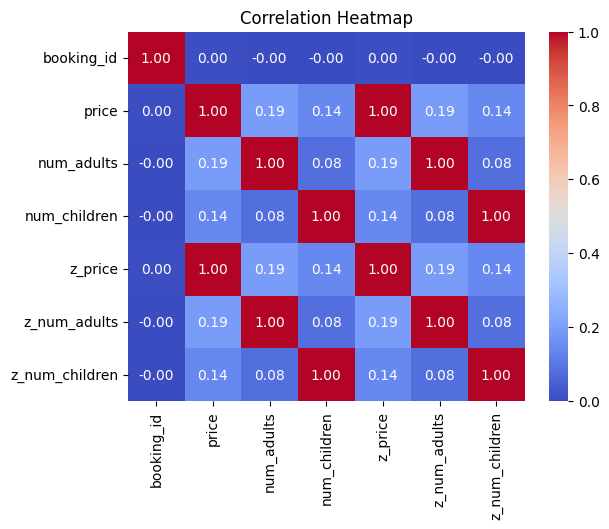

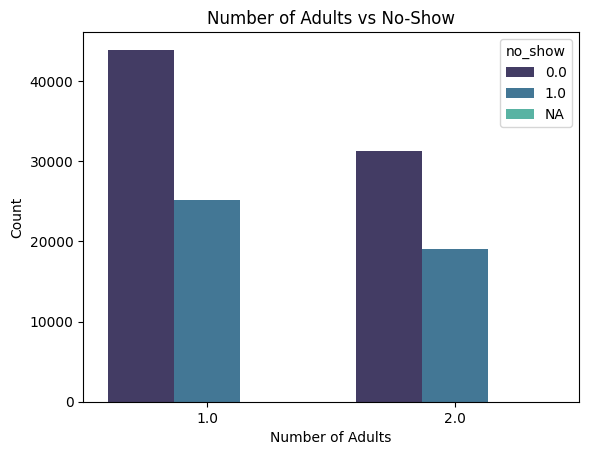

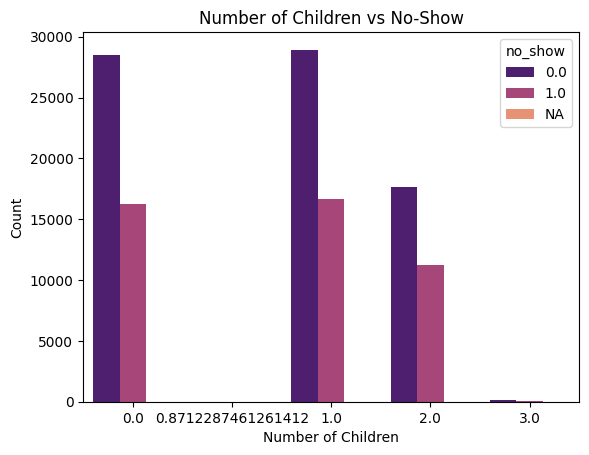

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#visualization

# Target Variable: no_show
# Objective: Understand the distribution of customers who show up vs. those who don’t.
data['no_show'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of No-Show vs. Show')
plt.xlabel('No-Show (0 = Show, 1 = No-Show)')
plt.ylabel('Count')
plt.show()
print()


# Hotel Branch Analysis
# Objective: Analyze how bookings are distributed across branches and their relation to no-shows.
sns.countplot(data=data, x='branch', hue='no_show', palette='Set2')
plt.title('Branch vs No-Show Rate')
plt.xlabel('Hotel Branch')
plt.ylabel('Count')
plt.show()
branch_stats = data.groupby(['branch', 'no_show']).size()
print("Branch No-Show Counts:\n", branch_stats)
print()

# Booking Month
# Objective: Understand if the month of booking affects no-shows.
sns.countplot(data=data, x='booking_month', hue='no_show', order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
])
plt.title('Booking Month vs No-Show')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
booking_month_stats = data.groupby(['booking_month', 'no_show']).size().unstack()
print("Booking Month vs No-Show:\n", booking_month_stats)


# Arrival and Checkout Days
# Visualization for Arrival Days:
sns.histplot(pd.to_numeric(data['arrival_day'], errors='coerce').dropna(), 
             kde=False, bins=31, color='green')
plt.title('Arrival Day Distribution')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.show()
arrival_mean = pd.to_numeric(data['arrival_day'], errors='coerce').mean()
arrival_median = pd.to_numeric(data['arrival_day'], errors='coerce').median()
print(f"Arrival Day - Mean: {arrival_mean}, Median: {arrival_median}\n")

# # Visualization for Checkout Days:
sns.histplot(data.loc[data['checkout_day'] != 'NA', 'checkout_day'], kde=False, bins=31, color='purple')
plt.title('Checkout Day Distribution')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.show()

# # Price Analysis
# # Objective: Analyze the distribution of room prices and their relationship to no-shows.
plot_data = data.dropna(subset=['price'])
plot_data['price'] = pd.to_numeric(plot_data['price'], errors='coerce')
plot_data['no_show'] = pd.to_numeric(plot_data['no_show'], errors='coerce')
sns.boxplot(x='no_show', y='price', data=plot_data.dropna())
plt.title('Room Price vs No-Show')
plt.xlabel('No-Show (0 = Show, 1 = No-Show)')
plt.ylabel('Room Price')
plt.show()


# # Room Type Analysis
# # Objective: Understand how room types correlate with no-shows.
sns.countplot(data=data, x='room', hue='no_show', palette='Set1')
plt.title('Room Type vs No-Show')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
room_type_stats = data.groupby(['room', 'no_show']).size()
print("Room Type vs No-Show Counts:\n", room_type_stats)
print()

# # Platform Analysis
# Objective: Determine if the platform used for booking influences no-shows.
sns.countplot(data=data, x='platform', hue='no_show', palette='coolwarm')
plt.title('Platform vs No-Show')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
platform_stats = data.groupby(['platform', 'no_show']).size()
print("Platform vs No-Show Counts:\n", platform_stats)
print()


# #  Correlation Heatmap
# #  Objective: Analyze the relationships between numerical variables (e.g., price, num_adults, num_children) and their influence on no_show.
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
corr = data.corr()
print("Correlation Matrix:\n", corr)

# # Group Size (Adults and Children)
# # Objective: Analyze the impact of group size on no-shows.
sns.countplot(data=data, x='num_adults', hue='no_show', palette='mako')
plt.title('Number of Adults vs No-Show')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.show()

# # Visualization for Children:
sns.countplot(data=data, x='num_children', hue='no_show', palette='magma')
plt.title('Number of Children vs No-Show')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()
adults_stats = data.groupby(['num_adults', 'no_show']).size()
children_stats = data.groupby(['num_children', 'no_show']).size()
print("Adults Stats:\n", adults_stats)
print("Children Stats:\n", children_stats)





In [29]:
# 1. No-Show Distribution
no_show_stats = data['no_show'].value_counts(normalize=True) * 100
print("No-Show Distribution (%):\n", no_show_stats)

# 2. Branch Analysis
branch_stats = data.groupby(['branch', 'no_show']).size()
print("Branch No-Show Counts:\n", branch_stats)

# 3. Booking Month Analysis
booking_month_stats = data.groupby(['booking_month', 'no_show']).size().unstack()
print("Booking Month vs No-Show:\n", booking_month_stats)

# 4. Arrival Day Analysis
arrival_mean = pd.to_numeric(data['arrival_day'], errors='coerce').mean()
arrival_median = pd.to_numeric(data['arrival_day'], errors='coerce').median()
print(f"Arrival Day - Mean: {arrival_mean}, Median: {arrival_median}")

# 5. Price Analysis
price_stats = data.groupby('no_show')['price'].describe()
print("Price Analysis:\n", price_stats)

# 6. Room Type Analysis
room_type_stats = data.groupby(['room', 'no_show']).size()
print("Room Type vs No-Show Counts:\n", room_type_stats)

# 7. Platform Analysis
platform_stats = data.groupby(['platform', 'no_show']).size()
print("Platform vs No-Show Counts:\n", platform_stats)

# 8. Correlation Matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
print("Correlation Matrix:\n", corr)

# 9. Group Size
adults_stats = data.groupby(['num_adults', 'no_show']).size()
children_stats = data.groupby(['num_children', 'no_show']).size()
print("Adults Stats:\n", adults_stats)
print("Children Stats:\n", children_stats)

No-Show Distribution (%):
 no_show
0.0    62.957844
1.0    37.041318
NA      0.000838
Name: proportion, dtype: float64
Branch No-Show Counts:
 branch   no_show
Changi   0.0        46228
         1.0        33102
NA       NA             1
Orchard  0.0        28938
         1.0        11122
dtype: int64
Booking Month vs No-Show:
 no_show           0.0     1.0   NA
booking_month                     
April          5821.0  3750.0  NaN
August         6456.0  3678.0  NaN
December       5982.0  3579.0  NaN
February       6339.0  3249.0  NaN
January        6634.0  3580.0  NaN
July           6037.0  3956.0  NaN
June           6099.0  4225.0  NaN
March          6201.0  3553.0  NaN
May            6200.0  3388.0  NaN
NA                NaN     NaN  1.0
November       6603.0  3677.0  NaN
October        6428.0  3640.0  NaN
September      6366.0  3949.0  NaN
Arrival Day - Mean: 15.798241058715135, Median: 16.0
Price Analysis:
            count        mean         std         min         25%         50

In [26]:
# # Outlier Detection:

# example of stat method
# from scipy.stats import zscore
# data['z_score'] = zscore(data['numeric_column'])
# data = data[data['z_score'].abs() < 3]  # Keep data within 3 standard deviations

# #IQR
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# outliers = data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]

from scipy.stats import zscore

# Select numerical columns
numerical_columns = ['price', 'num_adults', 'num_children']

# Process each numerical column
for col in numerical_columns:
    # Convert to numeric and handle non-numeric values
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
    
    # Handle missing values
    data[col].fillna(data[col].mean(), inplace=True)  # Replace NaNs with the mean of the column

    # Calculate Z-scores
    data[f'z_{col}'] = zscore(data[col])  # Compute Z-scores

    # Find outliers
    outliers = data[(data[f'z_{col}'] > 3) | (data[f'z_{col}'] < -3)]  # Z-scores beyond 3 or -3
    print(f"Outliers in {col}:")
    print(outliers[[col, f'z_{col}']])
    
# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers[[column]])
    return outliers

# Apply the function to numerical columns
for col in numerical_columns:
    detect_outliers_iqr(col)

Outliers in price:
           price   z_price
20      1725.373  3.455049
145     1736.293  3.502186
248     2002.680  4.652050
250     2059.320  4.896538
656     2036.130  4.796438
...          ...       ...
117426  1820.150  3.864156
117583  1739.712  3.516944
117831  1811.199  3.825519
117865  2049.880  4.855790
117964  1855.630  4.017306

[711 rows x 2 columns]
Outliers in num_adults:
Empty DataFrame
Columns: [num_adults, z_num_adults]
Index: []
Outliers in num_children:
Empty DataFrame
Columns: [num_children, z_num_children]
Index: []
Outliers in price:
           price
0        492.980
1       1351.220
5       1499.610
6       1375.440
9       1251.575
...          ...
119361  1160.796
119371   420.264
119378  1331.200
119381   431.509
119387  1353.677

[30923 rows x 1 columns]
Outliers in num_adults:
Empty DataFrame
Columns: [num_adults]
Index: []
Outliers in num_children:
        num_children
557              3.0
1885             3.0
2460             3.0
2562             3.0
335

Feature engineering

In [35]:
# Encode Categorical Features:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

'''# Example columns to encode
categorical_columns = ['branch', 'platform', 'room']

# One-Hot Encoding for nominal variables
data = pd.get_dummies(data, columns=categorical_columns)

# Label Encoding for ordinal variables
# Example: If you have ordinal data like `Low`, `Medium`, `High`
label_encoder = LabelEncoder()
data['booking_month'] = label_encoder.fit_transform(data['booking_month'])
'''

#encoding 2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['price', 'arrival_day', 'checkout_day']] = scaler.fit_transform(data[['price', 'arrival_day', 'checkout_day']])

label_encoder = LabelEncoder()

# Encoding Categorical Columns
# Encode month columns
data['booking_month'] = label_encoder.fit_transform(data['booking_month'])
data['arrival_month'] = label_encoder.fit_transform(data['arrival_month'])
data['checkout_month'] = label_encoder.fit_transform(data['checkout_month'])

#if requried
# data = pd.get_dummies(data, columns=['country'], drop_first=True)  # One-hot encoding



# train split
from sklearn.model_selection import train_test_split

X = data.drop(columns=['no_show', 'booking_id'])  # Features
y = data['no_show']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Analyze room type and no-show rate
sns.countplot(data=data, x='room_King', hue='no_show')
plt.title('King Room vs No-Show')
plt.show()

# Feature engineering
data['length_of_stay'] = data['checkout_day'] - data['arrival_day']
data['peak_season'] = data['arrival_month'].apply(lambda x: 1 if x in ['June', 'July', 'August'] else 0)
'''

# Normalize/Scale Data




KeyError: "None of [Index(['branch', 'platform', 'room'], dtype='object')] are in the [columns]"

In [34]:
print(data.head())

   booking_id no_show  booking_month arrival_month arrival_day checkout_month  \
0       94113     0.0             10          June        25.0           June   
1       86543     0.0              1      November        28.0       November   
2       75928     0.0              7      February         7.0       February   
3       66947     1.0             12       October         1.0        October   
4      106390     0.0              7          June        20.0           June   

  checkout_day    country first_time        price  ...  platform_Agent  \
0         27.0  Singapore        Yes   492.980000  ...           False   
1         29.0  Indonesia        Yes  1351.220000  ...           False   
2         11.0      India        Yes   924.948137  ...            True   
3          3.0      China        Yes   666.040000  ...           False   
4         24.0  Australia        Yes   864.981000  ...           False   

   platform_Email  platform_NA  platform_Phone  platform_Website  ro

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Step 1: Encode Categorical Features
categorical_columns = ['branch', 'platform', 'room']
# data = pd.get_dummies(data, columns=categorical_columns)

# If there are ordinal columns, use LabelEncoder (e.g., booking_month)
label_encoder = LabelEncoder()
data['booking_month'] = label_encoder.fit_transform(data['booking_month'])

# Step 2: Handle Missing Values
numerical_columns = ['price', 'num_adults', 'num_children']
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)  # Fill NaN with column mean

# Step 3: Normalize/Scale Numerical Data
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 4: Split Data into Training and Testing Sets
X = data.drop(columns=['no_show'])  # Features
y = data['no_show']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

KeyError: "None of [Index(['branch', 'platform', 'room'], dtype='object')] are in the [columns]"